In [97]:
import sys, os
import numpy as np
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [81]:
df_all = pd.read_csv('merged_sorted_r277all_n897_2_4_2021.csv')
#df_all.sort_values(by=['Family_ID','Age_in_Yrs'])
df_all.sort_values(by=['Family_ID'], inplace=True)

In [82]:
set_one = {'Subject': [], 'Family_ID' : []}
set_two = {'Subject': [], 'Family_ID' : []}
set_three = {'Subject': [], 'Family_ID' : []}
for subject in df_all['Subject']:
    #get family id
    fam_id = df_all[df_all['Subject'] == subject]['Family_ID'].values[0]
    if fam_id not in set_one['Family_ID']:
        set_one['Subject'].append(subject); set_one['Family_ID'].append(fam_id)
    elif fam_id not in set_two['Family_ID']:
        set_two['Subject'].append(subject); set_two['Family_ID'].append(fam_id)
    elif fam_id not in set_three['Family_ID']:
        set_three['Subject'].append(subject); set_three['Family_ID'].append(fam_id)

print('Set one has',len(set_one['Subject']), 'subjects and', len(np.unique(set_one['Family_ID'])), 'family ids')
print('Set two has',len(set_two['Subject']), 'subjects and', len(np.unique(set_two['Family_ID'])), 'family ids')
print('Set three has',len(set_three['Subject']), 'subjects and', len(np.unique(set_three['Family_ID'])), 'family ids')

print('a total of', np.sum([len(set_one['Subject']), len(set_two['Subject']),
                          len(set_three['Subject'])]), 'out of', len(df_all))
      
#create dataframes for each set - full data merged with list of ids built above
df_set_one = pd.merge(df_all,pd.DataFrame(set_one),how='inner',on=['Subject','Family_ID'])
df_set_two = pd.merge(df_all,pd.DataFrame(set_two),how='inner',on=['Subject','Family_ID'])
df_set_three = pd.merge(df_all,pd.DataFrame(set_three),how='inner',on=['Subject','Family_ID'])

Set one has 387 subjects and 387 family ids
Set two has 305 subjects and 305 family ids
Set three has 160 subjects and 160 family ids
a total of 852 out of 897


checking ages
set one
28.59173126614987 3.697716852682768
set two
28.64262295081967 3.8240163855363263
set three
28.4625 3.5317975239246087


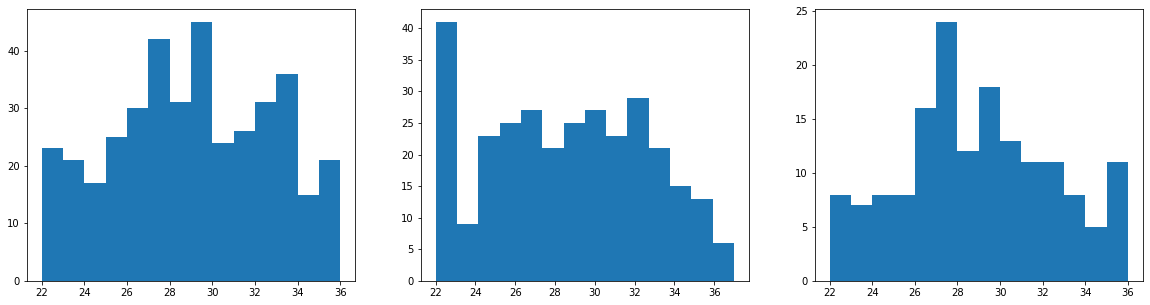

In [114]:
#demographics check - what are the age and sex distributions like

#set one
print("checking ages")
print("set one")
print(np.mean(df_set_one['Age_in_Yrs'].values), np.std(df_set_one['Age_in_Yrs'].values))

print("set two")
print(np.mean(df_set_two['Age_in_Yrs'].values), np.std(df_set_two['Age_in_Yrs'].values))

print("set three")
print(np.mean(df_set_three['Age_in_Yrs'].values), np.std(df_set_three['Age_in_Yrs'].values))

fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df_set_one['Age_in_Yrs'].values.flatten(),bins=14)
ax[1].hist(df_set_two['Age_in_Yrs'].values.flatten(),bins=14)
ax[2].hist(df_set_three['Age_in_Yrs'].values.flatten(),bins=14)
plt.show()

checking gender
set one
201 F 51.93798449612403 %
set two
160 F 52.459016393442624 %
set three
81 F 50.625 %


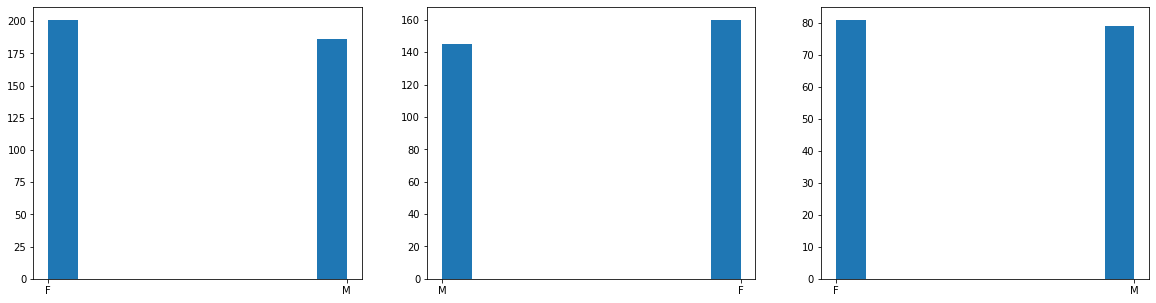

In [115]:
print("checking gender")
print("set one")
print(np.sum(df_set_one['Gender'] == 'F'), 'F',
      np.divide(np.sum(df_set_one['Gender'] == 'F'),len(df_set_one)) *100, '%')

print("set two")
print(np.sum(df_set_two['Gender'] == 'F'), 'F',
      np.divide(np.sum(df_set_two['Gender'] == 'F'),len(df_set_two)) *100, '%')

print("set three")
print(np.sum(df_set_three['Gender'] == 'F'), 'F',
      np.divide(np.sum(df_set_three['Gender'] == 'F'),len(df_set_three)) *100, '%')

fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df_set_one['Gender'].values.flatten())
ax[1].hist(df_set_two['Gender'].values.flatten())
ax[2].hist(df_set_three['Gender'].values.flatten())
plt.show()

In [117]:
#am content with the number and age/sex distribution, write out
df_set_one.sort_values(by='Age_in_Yrs', inplace=True)
df_set_one.to_csv('merged_sorted_r277_unrelated_setA_n387.csv', index=False)

df_set_two.sort_values(by='Age_in_Yrs', inplace=True)
df_set_two.to_csv('merged_sorted_r277_unrelated_setB_n305.csv', index=False)

df_set_three.sort_values(by='Age_in_Yrs', inplace=True)
df_set_three.to_csv('merged_sorted_r277_unrelated_setC_n160.csv', index=False)